### Given two list of x and y coordinates, and a list of errors on y, find the straight line that minimizes the sum of distances between the line and the (x,y) points.

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
xdata = np.array([
60.000 - 843,
120.000- 843,
180.000- 843,
240.000- 843,
300.000- 843,
360.000- 843,
420.000- 843,
480.000- 843,
540.000- 843,
600.000- 843,
660.000- 843])
ydata = np.array([
15.310,
15.320,
15.330,
15.350,
15.370,
15.390,
15.410,
15.430,
15.450,
15.460,
15.490])
yerr = np.array([
0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,0.005467996881764883,
])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
npoint = len(xdata)
npoint

11

Determiniamo i parametri $a$ and $b$ della retta di best fit $y = b x + a$ che minimizza:
$ \chi^2 = \sum_i \frac{(y_i - b x_i - a)^2}{\sigma_i^2}$
    
$a$ e $b$ sono soluzioni del sistema lineare:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}
\end{bmatrix}$
$\begin{bmatrix} a\\b \end{bmatrix}$ = 
$\begin{bmatrix} \sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [21]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_xSq_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()

Calcolo Coefficiente correlazione lineare

In [22]:
sum_x = (xdata).sum()
sum_y = (ydata).sum()
xmean=sum_x/npoint
ymean=sum_y/npoint
ameanx=xdata-xmean
varx = (ameanx*ameanx).sum()
devstx = np.sqrt(varx)
ameany = ydata-ymean
vary = (ameany*ameany).sum()
devsty = np.sqrt(vary)
covxy = (ameanx*ameany).sum()
corrcoeff=covxy/(devstx*devsty)
print ("coefficiente correlazione = ",corrcoeff)


coefficiente correlazione =  0.9963925198073199


In [23]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq],[sum_x_over_yerrSq,sum_xSq_over_yerrSq]])
matD

array([[ 3.67905405e+05, -1.77698311e+08],
       [-1.77698311e+08,  9.90728787e+10]])

In [24]:
matD_inv = np.linalg.inv(matD)
matD_inv

array([[2.03319927e-05, 3.64677074e-08],
       [3.64677074e-08, 7.55024997e-11]])

Check D^(-1)D = I

In [25]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -3.46944695e-18],
       [ 0.00000000e+00,  1.00000000e+00]])

In [26]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq])
matB

array([ 5.66273311e+06, -2.73104644e+09])

In [27]:
np.dot(matD_inv,matB)

array([1.55396455e+01, 3.06060606e-04])

Calcolo parametri fit

In [28]:
a, b = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1]
print (" intercetta a (u.m.)= ", a)
print (" coeff.angolare b (u.m.)= ", b)

 intercetta a (u.m.)=  15.539645454545536
 coeff.angolare b (u.m.)=  0.00030606060606072627


Calcolo errori sui parametri

In [29]:
siga, sigb = np.sqrt(matD_inv[0,0]), np.sqrt(matD_inv[1,1])
print (" errore su intercetta siga (u.m.)= ",siga)
print (" errore su coeff.angolare sigb (u.m.)= ",sigb)

 errore su intercetta siga (u.m.)=  0.004509101091549319
 errore su coeff.angolare sigb (u.m.)=  8.689217441457288e-06


Plot

<ErrorbarContainer object of 3 artists>

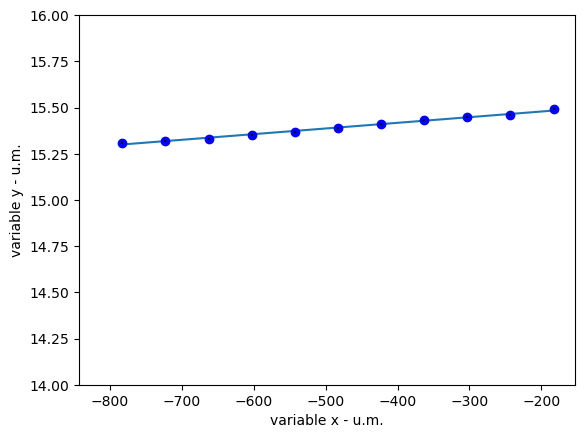

In [32]:
fig, ax = plt.subplots()
ax.set_ylim(14,16)
ax.set_xlim(-843, 690-843)
ax.set_xlabel('variable x - u.m.')
ax.set_ylabel('variable y - u.m.')
plt.plot(xdata,b*xdata+a,xdata,ydata,'bo')
plt.errorbar(xdata,ydata,yerr=yerr,ecolor='black', ls=" ")

Calcolo X^2 e errore standard della stima

In [31]:
scarto1 = (ydata-a-b*xdata)/yerr
scarto2 = (ydata-a-b*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-2)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima (u.m.) = ",errst)

 Chi^2 =  9.000000000000004
 errore standard della stima (u.m.) =  0.0054679968817648835


In [14]:
#Intercetta con retta vert     x = 843      e retta    y = 15.281636363636395 + 0.00031x

In [17]:
intercettay = a + b*843 
intercettay

15.539645454545424